In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mzn_bench as mb

import os

In [10]:
root = os.path.dirname(os.path.abspath("__file__"))
data = pd.read_csv(os.path.join(root, 'statistics.csv'))
data = data.astype({'time': float, 'objective': int})

In [20]:
blackbox = data[data['configuration'].str.contains('BB', case=False)][['data_file', 'time', 'objective']]
blackbox['type'] = 'blackbox'
decomp = data[data['configuration'].str.contains('Decomp', case=False)][['data_file', 'time', 'objective']]
decomp['type'] = 'decomp'
results = pd.concat([blackbox, decomp], ignore_index=True)

In [21]:
results

,data_file,time,objective,type
0,dzn/ta70_3a_alloc3.dzn,602.206626,-6048,blackbox
1,dzn/ta74_9a_alloc2.dzn,606.975192,-1078,blackbox
2,dzn/ta71_6a_alloc2.dzn,605.384302,-1790,blackbox
3,dzn/ta46_2a_alloc3.dzn,600.717647,-9105,blackbox
4,dzn/ta60_3a_alloc1.dzn,601.336048,-5131,blackbox
...,...,...,...,...
956,dzn/ta65_5a_alloc3.dzn,55.571308,-9404,decomp
957,dzn/ta76_5a_alloc3.dzn,607.165771,-15517,decomp
958,dzn/ta79_5a_alloc1.dzn,607.579004,-14163,decomp
959,dzn/ta50_3a_alloc1.dzn,12.172922,-9706,decomp


In [5]:
results['diff'] = results['time_BB'] - results['time_Decomp']
results['diff'].value_counts(bins=10)

diff
(-0.0223, 0.362]                 207
(-0.407, -0.0223]                170
(-0.792, -0.407]                  34
(0.362, 0.747]                    34
(-1.177, -0.792]                  14
(0.747, 1.132]                    12
(-1.561, -1.177]                   3
(1.517, 1.901]                     3
(1.132, 1.517]                     2
(-1.9509999999999998, -1.561]      1
Name: count, dtype: int64

In [18]:
results.sort_values('data_file', inplace=True)

In [ ]:
r = pd.to_timedelta(results['time_BB'], unit='s')

292   0 days 00:00:02.116323576
275   0 days 00:00:04.213578336
12    0 days 00:00:06.332467712
329   0 days 00:00:08.442045322
411   0 days 00:00:10.590471803
                 ...           
182   0 days 01:59:41.230369811
173   0 days 02:00:13.481463288
55    0 days 02:00:46.557588469
128   0 days 02:01:18.764428951
248   0 days 02:01:51.655020165
Name: time_BB, Length: 480, dtype: timedelta64[ns]

In [5]:
r = results[['time_BB', 'time_Decomp']].reset_index(drop=True)
r = r.rename(columns={'time_BB': 'Blackbox', 'time_Decomp': 'Decomp'}).astype(float)

<Axes: title={'center': 'Blackbox vs Decomposition'}, xlabel='Instance solves', ylabel='Time (s)'>

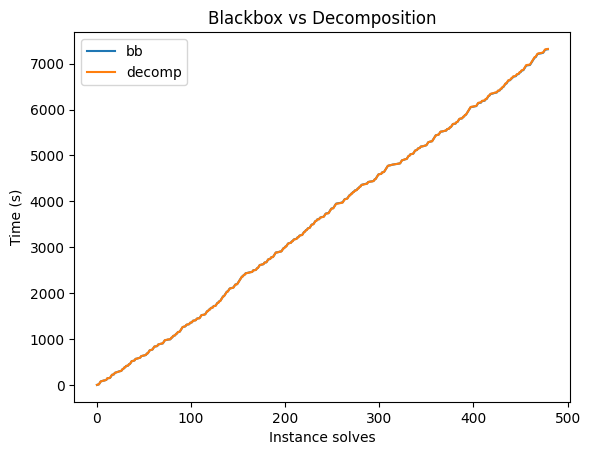

In [10]:
r['bb'] = r['Blackbox'].cumsum()
r['decomp'] = r['Decomp'].cumsum()
r[['bb', 'decomp']].plot(xlabel='Instance solves', ylabel='Time (s)', title='Blackbox vs Decomposition')

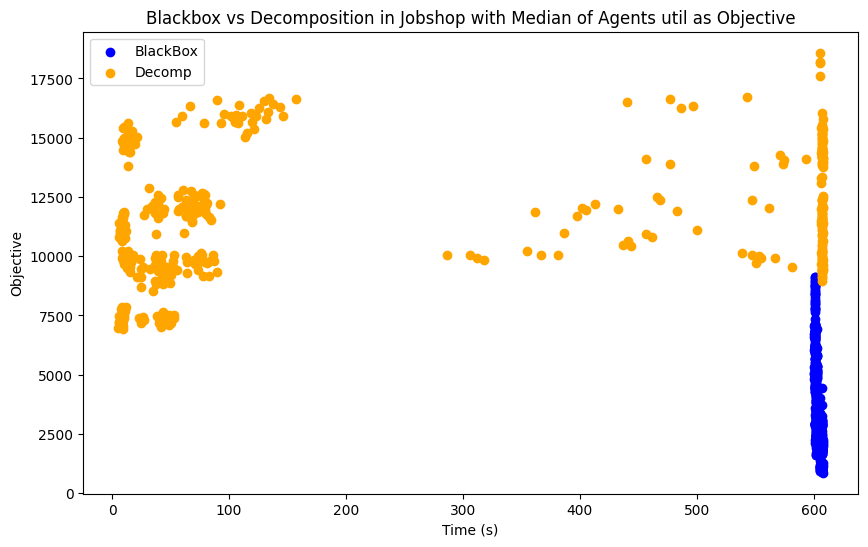

In [ ]:
# Filter and sort the data for each type
r = results[['time', 'objective', 'type']].copy()
r['objective'] = -r['objective'].astype(int) 
r = r[r['objective'] >= 0] # Remove outliers
blackbox_data = r[r['type'] == 'blackbox'].sort_values('time')
decomp_data = r[r['type'] == 'decomp'].sort_values('time')

plt.figure(figsize=(10,6))
plt.scatter(blackbox_data['time'], blackbox_data['objective'], color='blue', marker='o', label='BlackBox')
plt.scatter(decomp_data['time'], decomp_data['objective'], color='orange', marker='o', label='Decomp')
plt.xlabel('Time (s)')
plt.ylabel('Objective')
plt.title('Blackbox vs Decomposition in Jobshop with Median of Agents util as Objective')
plt.legend()
plt.show()